In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import matplotlib.axes._axes as axes
sns.set()

In [2]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from loader_util.preprocessing import ImageToArrayPreprocessor, AspectAwarePreprocessor
from loader_util.datasets import SimpleDatasetLoader
from loader_util.nn.conv import FCHeadNet
##
from tensorflow.keras.layers import Conv2D, Activation, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from imutils import paths

In [13]:
from cv2 import cv2
thresh = 210
max_val = 255
target_image_size = 28
aap = AspectAwarePreprocessor(target_image_size, target_image_size)

In [14]:

# first read the image
img = cv2.imread('Bracket2_12.9.2.png', cv2.IMREAD_GRAYSCALE)
image = cv2.imread('Bracket2_12.9.2.png')
image = aap.preprocess(image)
imageCopy = image.copy() # Convert to grayscale
imageGray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [15]:
# do inverse thresholding
th, dst_bin = cv2.threshold(imageGray.copy(),
                            thresh=thresh,
                            maxval=max_val,
                            type=cv2.THRESH_BINARY_INV)

In [16]:
# find all contours in the image
contours, hierarchy = cv2.findContours(dst_bin.copy(),
                                       cv2.RETR_EXTERNAL,
                                       cv2.CHAIN_APPROX_NONE)

In [17]:
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)

    cv2.rectangle(imageCopy, (x,y), (x+w,y+h), (255,0,255), 2)

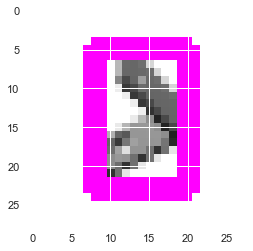

In [18]:
plt.imshow(imageCopy[:,:,::-1])

In [19]:
final_image = dst_bin.copy()
final_image = final_image[y:y + h, x:x + w]

(18, 12)

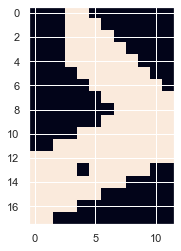

In [20]:
plt.imshow(final_image)
final_image.shape

In [21]:
final_image2 = aap.preprocess(final_image.copy())

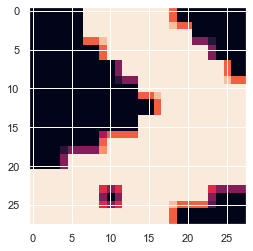

In [22]:
plt.imshow(final_image2)
